In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/coronavirusdataset/patient.csv
/kaggle/input/coronavirusdataset/case.csv
/kaggle/input/coronavirusdataset/trend.csv
/kaggle/input/coronavirusdataset/time.csv
/kaggle/input/coronavirusdataset/route.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
patient = pd.read_csv('/kaggle/input/coronavirusdataset/patient.csv')
case = pd.read_csv('/kaggle/input/coronavirusdataset/case.csv')
trend = pd.read_csv('/kaggle/input/coronavirusdataset/trend.csv')
time = pd.read_csv('/kaggle/input/coronavirusdataset/time.csv')
route = pd.read_csv('/kaggle/input/coronavirusdataset/route.csv')


In [4]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7869 entries, 0 to 7868
Data columns (total 15 columns):
patient_id          7869 non-null int64
sex                 679 non-null object
birth_year          666 non-null float64
country             7869 non-null object
region              437 non-null object
disease             28 non-null float64
group               86 non-null object
infection_reason    154 non-null object
infection_order     36 non-null float64
infected_by         70 non-null float64
contact_number      53 non-null float64
confirmed_date      7869 non-null object
released_date       56 non-null object
deceased_date       36 non-null object
state               7869 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 922.3+ KB


In [6]:
patient.describe()

,patient_id,birth_year,disease,infection_order,infected_by,contact_number
count,7869.000000,666.000000,28.0,36.000000,70.000000,53.000000
mean,3935.000000,1974.271772,1.0,4.277778,379.000000,67.849057
std,2271.728967,17.423250,0.0,12.032364,540.247528,177.723575
min,1.000000,1929.000000,1.0,1.000000,3.000000,0.000000
25%,1968.000000,1962.000000,1.0,1.000000,29.250000,3.000000
50%,3935.000000,1974.000000,1.0,2.000000,126.000000,17.000000
75%,5902.000000,1990.000000,1.0,3.000000,563.250000,45.000000
max,7869.000000,2018.000000,1.0,74.000000,2621.000000,1160.000000


In [7]:
patient.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [8]:
patient.isna().sum()

patient_id             0
sex                 7190
birth_year          7203
country                0
region              7432
disease             7841
group               7783
infection_reason    7715
infection_order     7833
infected_by         7799
contact_number      7816
confirmed_date         0
released_date       7813
deceased_date       7833
state                  0
dtype: int64

In [9]:
patient.shape

(7869, 15)

In [10]:
# Creating a copy of patients
data = patient.copy()

In [11]:
# Changing the data type of Year to int type
patient['birth_year'] = patient['birth_year'].fillna(0.0).astype(int)
patient['birth_year'] = patient['birth_year'].map(lambda x: x if x > 0 else np.nan)

In [12]:
patient['age'] = 2020 - patient['birth_year']

In [13]:
import math
def age_group(age):
    if age >= 0:
        if age % 10 != 0:
            lower = (math.floor(age/10))*10
            upper = (math.ceil(age/10))*10-1
            return (str(lower) + '-' + str(upper))
        else:
            lower = int(age)
            upper = int(age + 9)
            return f"{lower} - {upper}"
    return ('Unknown')

In [14]:
patient['age_group'] = patient['age'].apply(age_group)

In [15]:
patient['confirmed_date'] = pd.to_datetime(patient['confirmed_date'])
patient['released_date'] = pd.to_datetime(patient['released_date'])
patient['deceased_date'] = pd.to_datetime(patient['deceased_date'])

In [16]:
patient['release_time'] = patient['released_date'] - patient['confirmed_date']
patient['death_time'] = patient['deceased_date'] - patient['confirmed_date']
patient['duration_since_confirmed'] = patient[['release_time', 'death_time']].min(axis=1)
patient["duration_days"] = patient["duration_since_confirmed"].dt.days

In [17]:
recovered_patients = patient.loc[patient['state'] == 'released'].shape[0] / patient.shape[0]
isolated_patients = patient.loc[patient['state'] == 'isolated'].shape[0] / patient.shape[0]
deceased_patients = patient.loc[patient['state'] == 'deceased'].shape[0] / patient.shape[0]

print('The percentage of recovery is ' + str(recovered_patients*100))
print('The percentage of isolated is ' + str(isolated_patients*100))
print('The percentage of deceased is ' + str(deceased_patients*100))

The percentage of recovery is 0.7116533231668573
The percentage of isolated is 98.8308552547973
The percentage of deceased is 0.4574914220358368


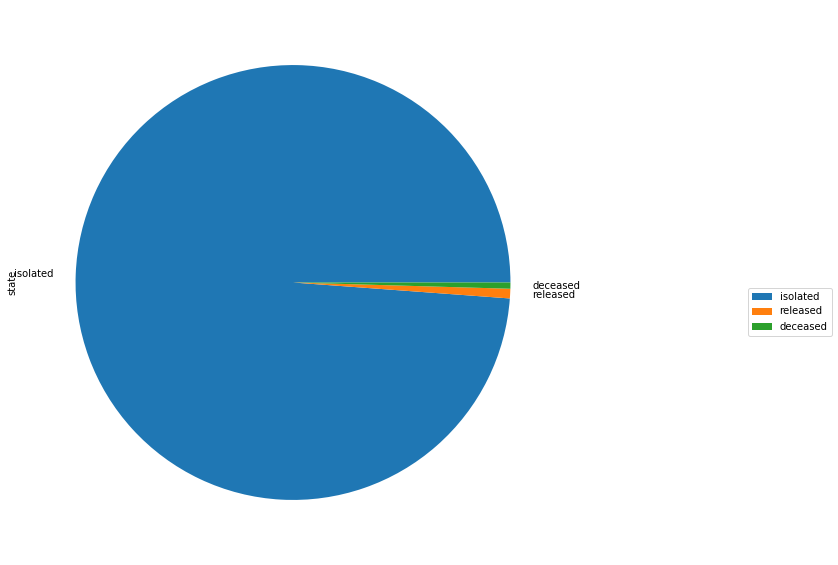

In [23]:
k = patient['state'].value_counts()
k.plot(kind='pie', figsize=(20,10),legend=True)
plt.legend(loc=0, bbox_to_anchor=(1.5,0.5))

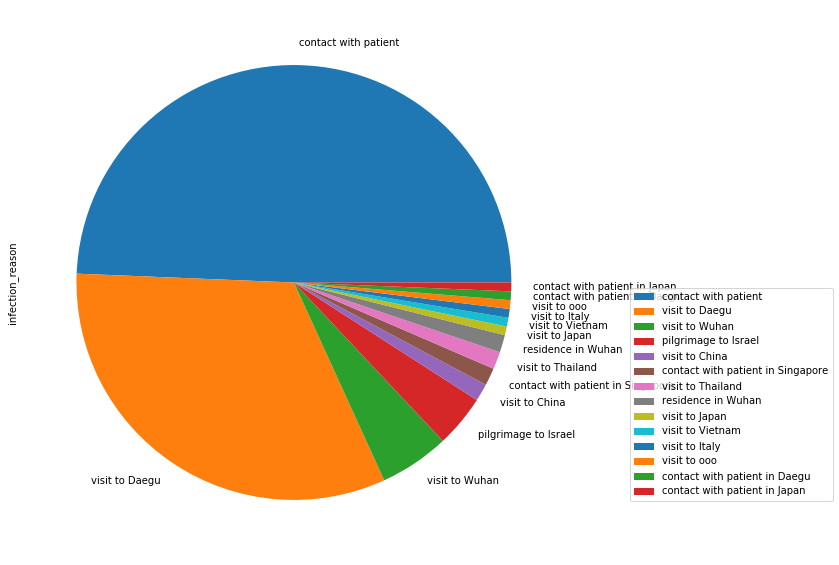

In [25]:
a = patient['infection_reason'].value_counts()
a.plot(kind='pie', figsize=(20,10), legend=True)
plt.legend(loc=0, bbox_to_anchor=(1.5,0.5))

**Split the Data according to the state of the patient**

In [26]:
released = patient[patient.state == 'released']
isolated = patient[patient.state == 'isolated']
deceased = patient[patient.state == 'deceased']

In [27]:
patient['state_by_gender'] = patient['state'] + '_' + patient['sex']

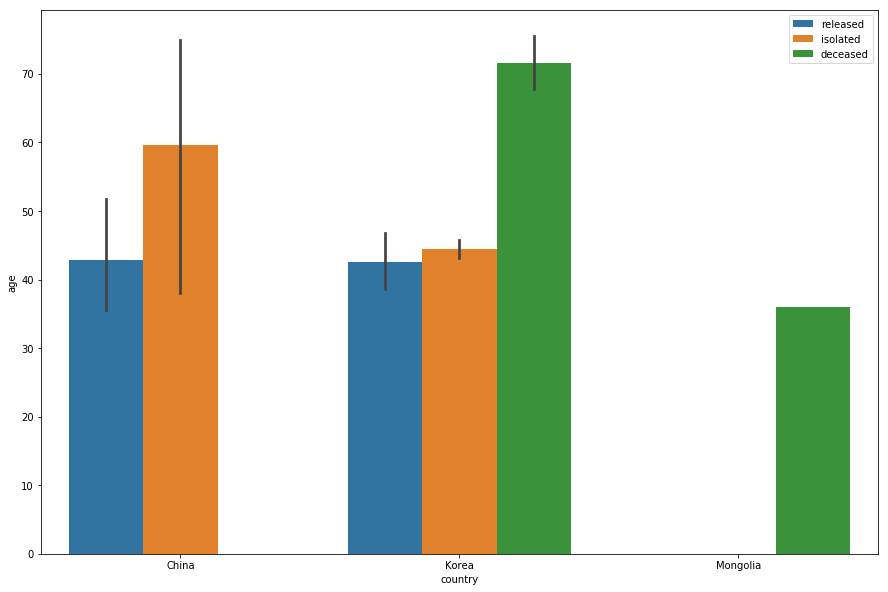

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='country', y='age', hue='state', data=patient)
plt.legend(loc='best')

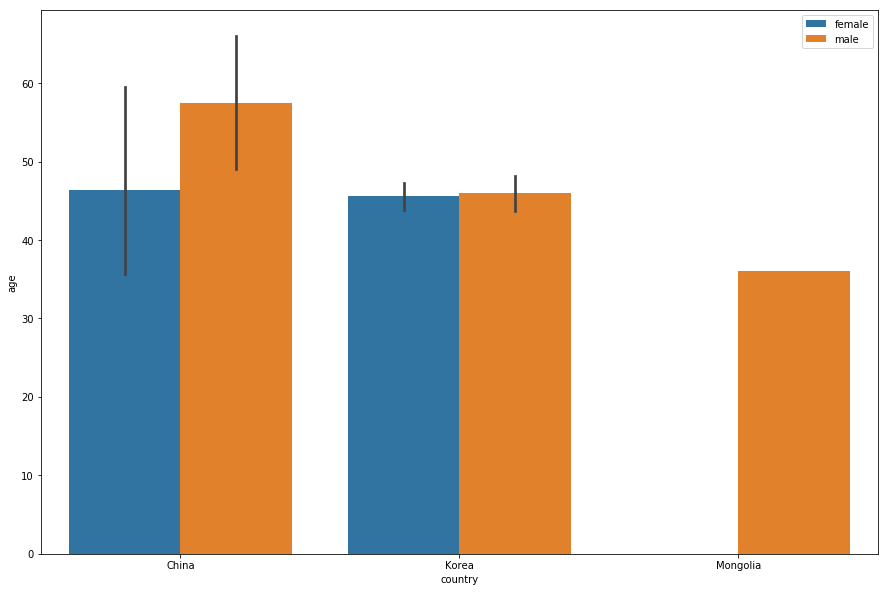

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x='country', y='age', hue='sex', data=patient)
plt.legend(loc='best')

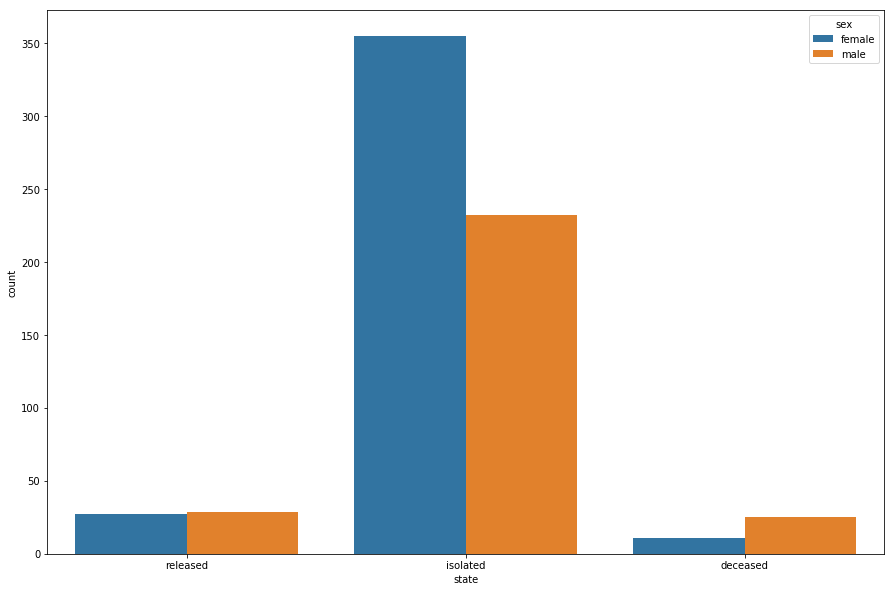

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(data=patient, x='state', hue='sex')

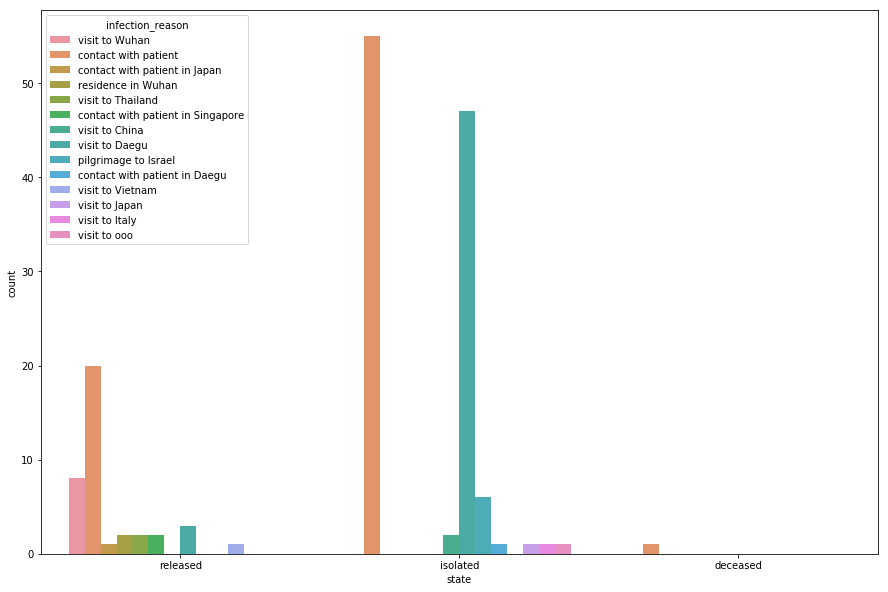

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(data=patient, x='state', hue='infection_reason')

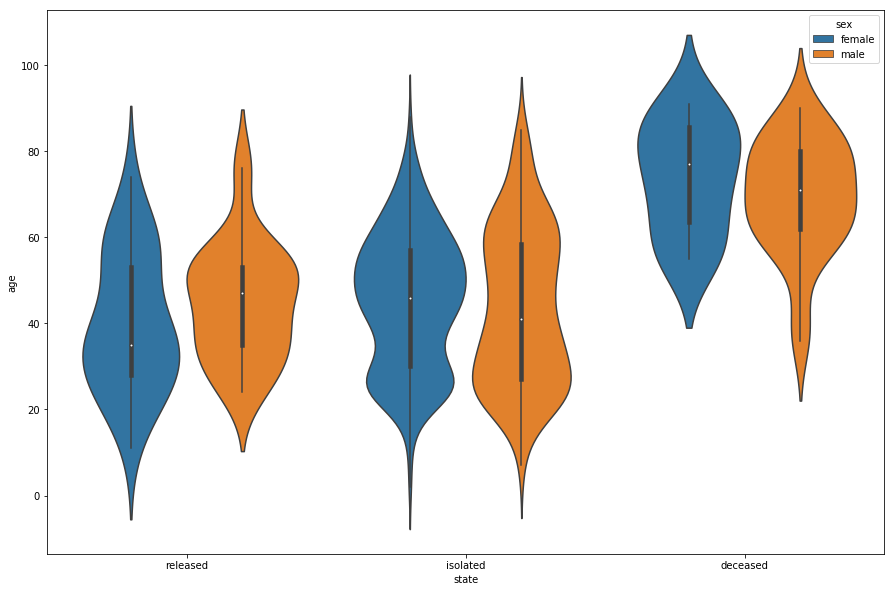

In [34]:
plt.figure(figsize=(15,10))
sns.violinplot(data=patient, x='state', y='age', hue='sex')
plt.show()

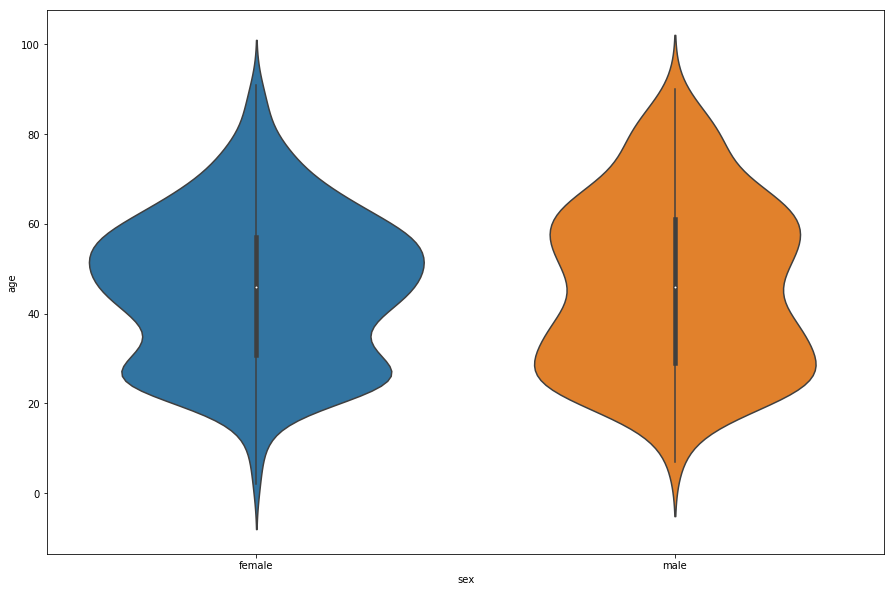

In [35]:
plt.figure(figsize=(15,10))
sns.violinplot(data=patient, x='sex', y='age')
plt.show()

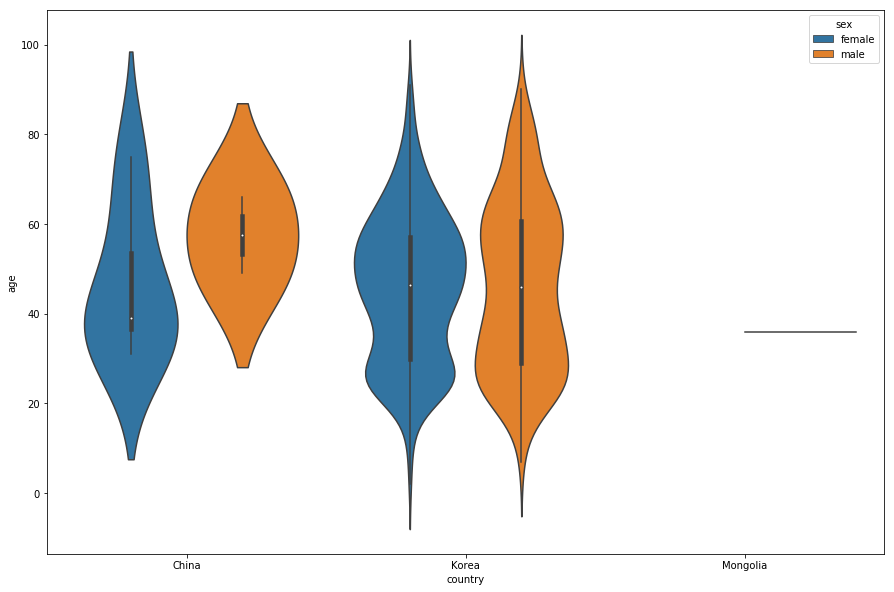

In [37]:
plt.figure(figsize=(15,10))
sns.violinplot(data=patient,x='country',y='age',hue='sex')
plt.show()

**Accumulated Count of Patients till date**

In [38]:
daily_count = patient.groupby(patient.confirmed_date).patient_id.count()

In [39]:
accumulated_count = daily_count.cumsum()

Text(0.5, 1.0, 'Accumulated Count of Confirmed Cases')

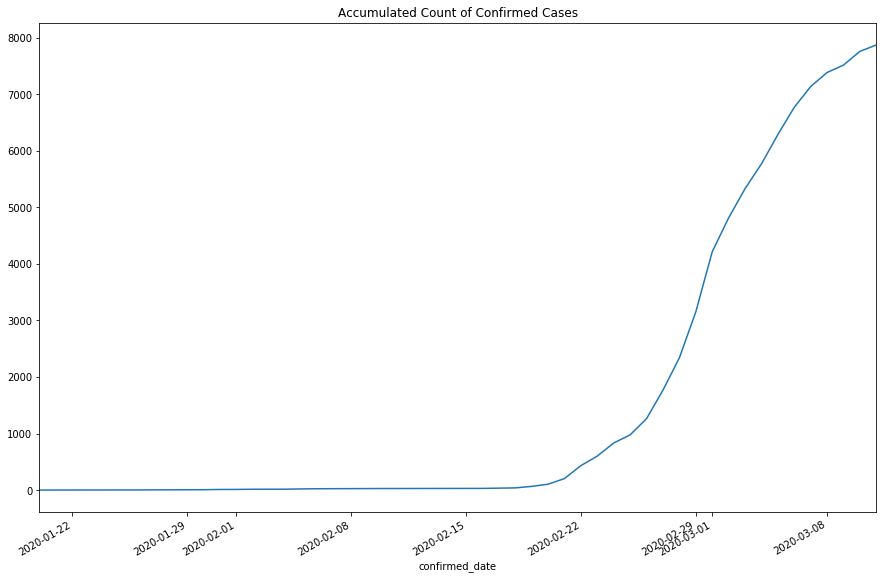

In [40]:
plt.figure(figsize=(15,10))
accumulated_count.plot()
plt.title('Accumulated Count of Confirmed Cases')

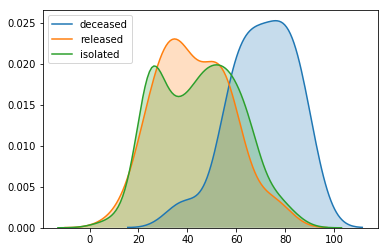

In [41]:
sns.kdeplot(data=deceased['age'],label='deceased', shade=True)
sns.kdeplot(data=released['age'],label='released', shade=True)
sns.kdeplot(data=isolated['age'],label='isolated', shade=True)

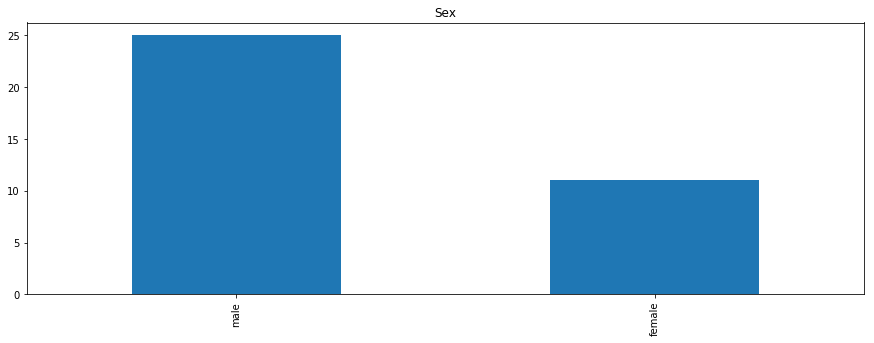

In [42]:
plt.figure(figsize=(15, 5))
plt.title('Sex')
deceased.sex.value_counts().plot.bar()

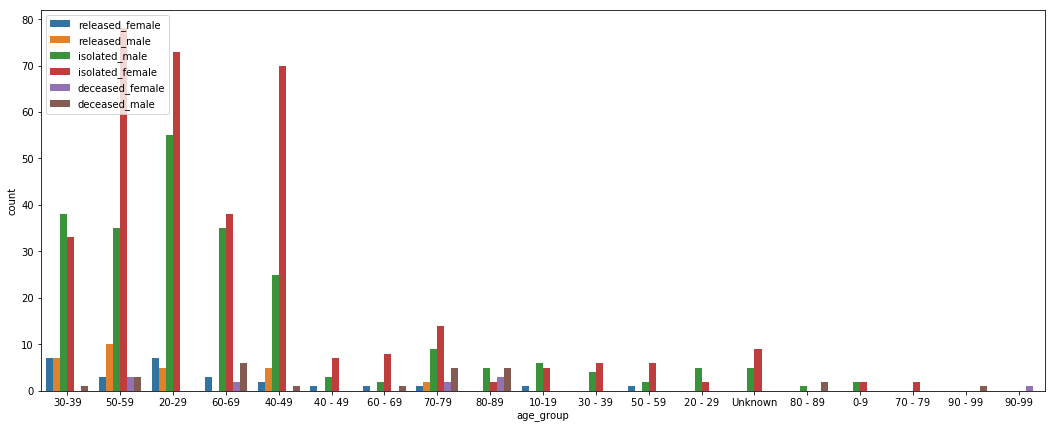

In [43]:
plt.figure(figsize=[18,7])
sns.countplot(data=patient,x='age_group',hue='state_by_gender')
plt.legend(loc='best')

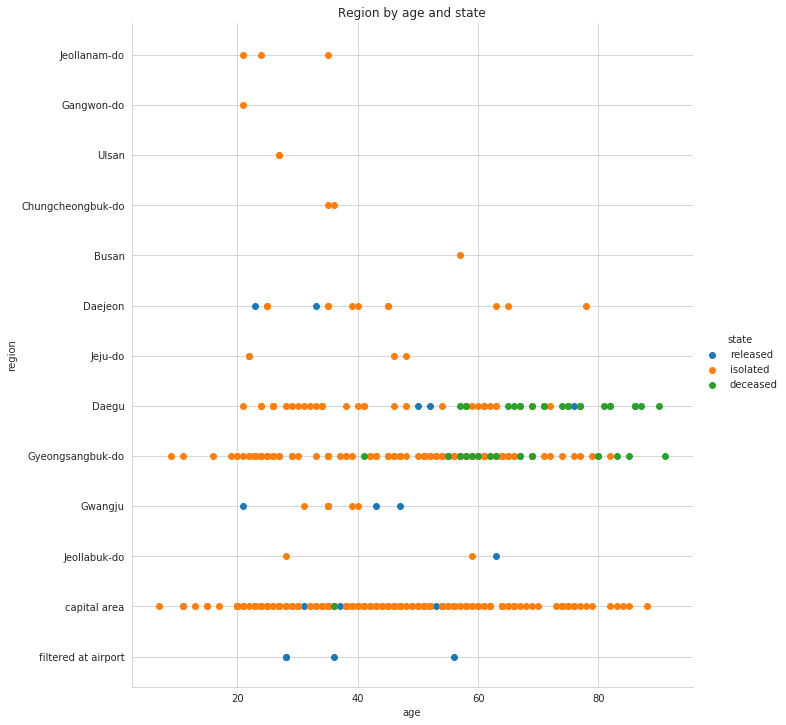

In [44]:
sns.set_style("whitegrid")
sns.FacetGrid(patient, hue = 'state', height = 10).map(plt.scatter, 'age', 'region').add_legend()
plt.title('Region by age and state')
plt.show()

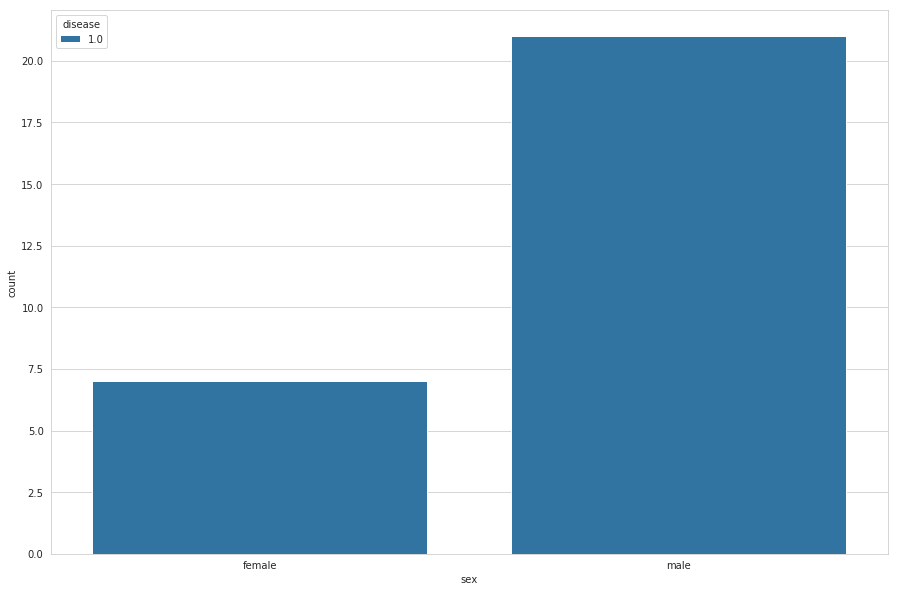

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(data=deceased,x='sex',hue='disease')

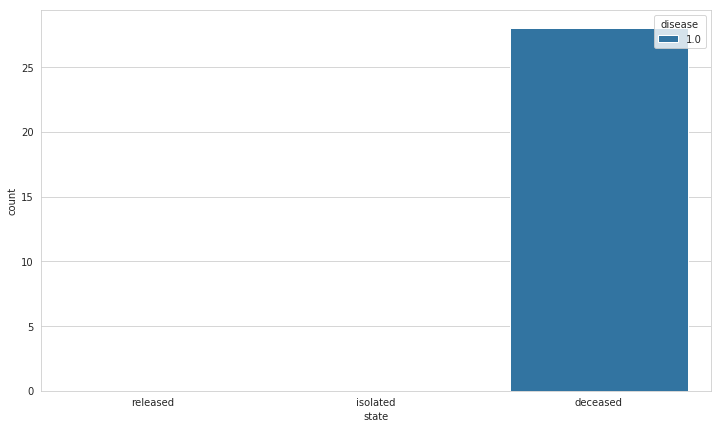

In [48]:
# disease = 1 means that the patient had an underlying disease.
plt.figure(figsize=[12,7])
sns.countplot(data=patient,x='state',hue='disease')

**Route Dataset**

In [49]:
route.head()

,patient_id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [50]:
route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
patient_id    212 non-null int64
date          212 non-null object
province      212 non-null object
city          212 non-null object
visit         212 non-null object
latitude      212 non-null float64
longitude     212 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.7+ KB


In [51]:
route.describe()

,patient_id,latitude,longitude
count,212.000000,212.000000,212.000000
mean,22.589623,37.133728,127.286846
std,13.130641,0.755617,0.742390
min,1.000000,34.996485,126.387447
25%,12.000000,37.278950,126.922150
50%,22.000000,37.504911,127.015951
75%,30.000000,37.575981,127.124582
max,56.000000,37.948023,129.355059


In [52]:
route.isna().sum()

patient_id    0
date          0
province      0
city          0
visit         0
latitude      0
longitude     0
dtype: int64

In [53]:
cluster = route.loc[:, ['id', 'latitude', 'longitude']]
cluster.head(5)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,id,latitude,longitude
0,NaN,37.460459,126.440680
1,NaN,37.478832,126.668558
2,NaN,37.562143,126.801884
3,NaN,37.567454,127.005627
4,NaN,37.460459,126.440680


In [54]:
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.tsa.seasonal import seasonal_decompose

Using TensorFlow backend.


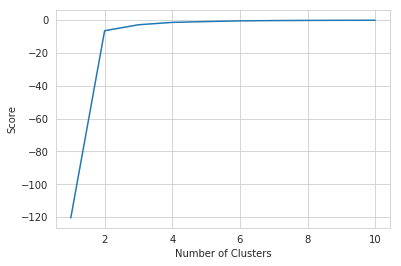

In [55]:
K_clusters = range(1,11)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = route[['latitude']]
X_axis = route[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(cluster[cluster.columns[1:3]])
cluster['cluster_label'] = kmeans.fit_predict(cluster[cluster.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(cluster[cluster.columns[1:3]])

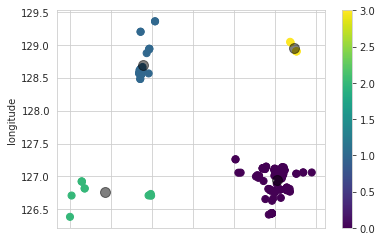

In [59]:
cluster.plot.scatter(x='latitude', y='longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)

In [60]:
import folium
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=7,tiles='Stamen Toner')

for lat, lon,city in zip(route['latitude'], route['longitude'],route['city']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('City: ' + str(city) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(southkorea_map)
southkorea_map

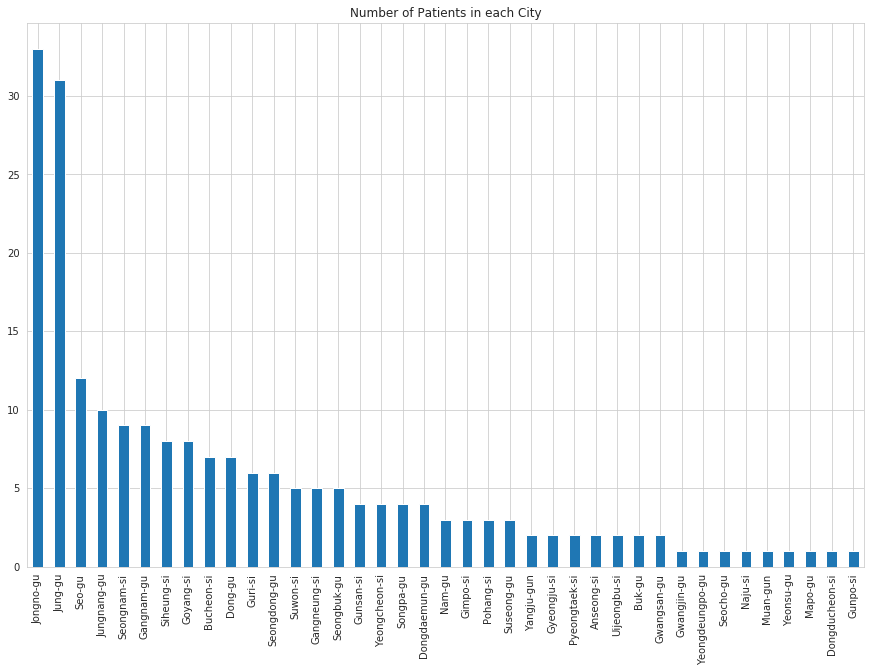

In [61]:
plt.figure(figsize=(15,10))
plt.title('Number of Patients in each City')
route.city.value_counts().plot.bar()

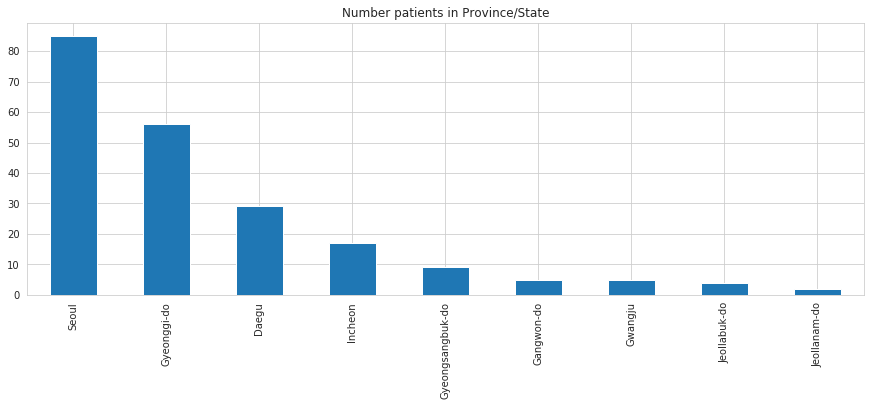

In [62]:
plt.figure(figsize=(15,5))
plt.title('Number patients in Province/State')
route.province.value_counts().plot.bar()

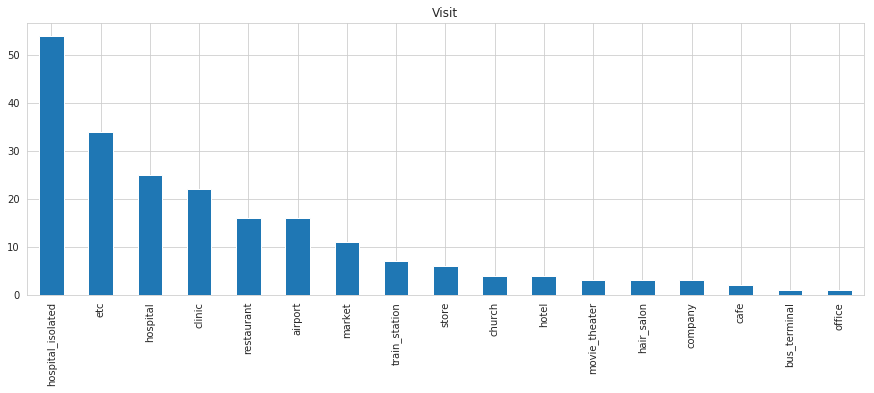

In [63]:
plt.figure(figsize=(15,5))
plt.title('Visit')
route.visit.value_counts().plot.bar()

**Time from confirmation to release or death based on gender**

Text(0.5, 1.0, 'Time from confirmation to release or death')

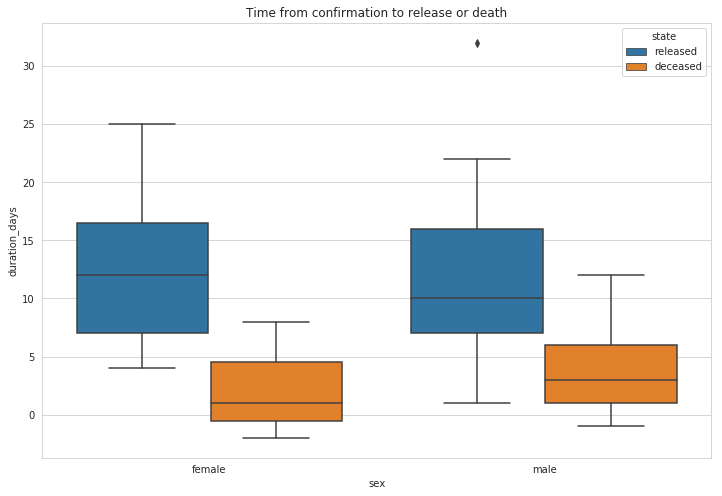

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="sex",
            y="duration_days",hue='state',
            hue_order=["released", "deceased"],
            data=patient)
plt.title("Time from confirmation to release or death")

Text(0.5, 1.0, 'Time from confirmation to release or death')

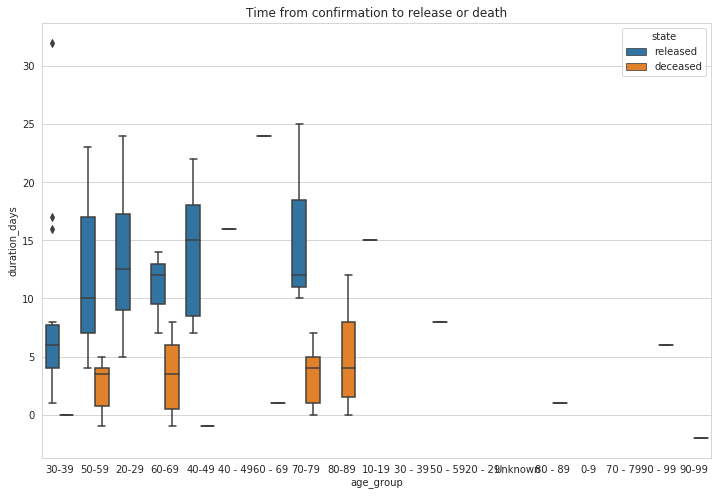

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="age_group",
            y="duration_days",hue='state',
            hue_order=["released", "deceased"],
            data=patient)
plt.title("Time from confirmation to release or death")

**Trend of Different diseases dataset**

In [67]:
trend.describe()

,cold,flu,pneumonia,coronavirus
count,96.000000,96.000000,96.000000,96.000000
mean,0.561531,0.426736,1.077302,25.052006
std,0.501887,0.261861,1.689100,27.923156
min,0.113630,0.067170,0.191900,0.008360
25%,0.165400,0.176580,0.301760,0.021155
50%,0.321305,0.411435,0.463935,15.497345
75%,0.901265,0.596727,0.997560,41.564593
max,1.942030,1.181600,11.393200,100.000000


In [68]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
date           96 non-null object
cold           96 non-null float64
flu            96 non-null float64
pneumonia      96 non-null float64
coronavirus    96 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [69]:
trend_cold=trend[['date','cold']]
trend_flu=trend[['date','flu']]
trend_pneumonia=trend[['date','pneumonia']]
trend_coronavirus=trend[['date','coronavirus']]

In [70]:
trend_cold['date']=pd.to_datetime(trend_cold['date'])
trend_cold.index=trend_cold['date']
trend_cold.drop(['date'],axis=1,inplace=True)
trend_flu['date']=pd.to_datetime(trend_flu['date'])
trend_flu.index=trend_flu['date']
trend_flu.drop(['date'],axis=1,inplace=True)
trend_pneumonia['date']=pd.to_datetime(trend_pneumonia['date'])
trend_pneumonia.index=trend_pneumonia['date']
trend_pneumonia.drop(['date'],axis=1,inplace=True)
trend_coronavirus['date']=pd.to_datetime(trend_coronavirus['date'])
trend_coronavirus.index=trend_coronavirus['date']
trend_coronavirus.drop(['date'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

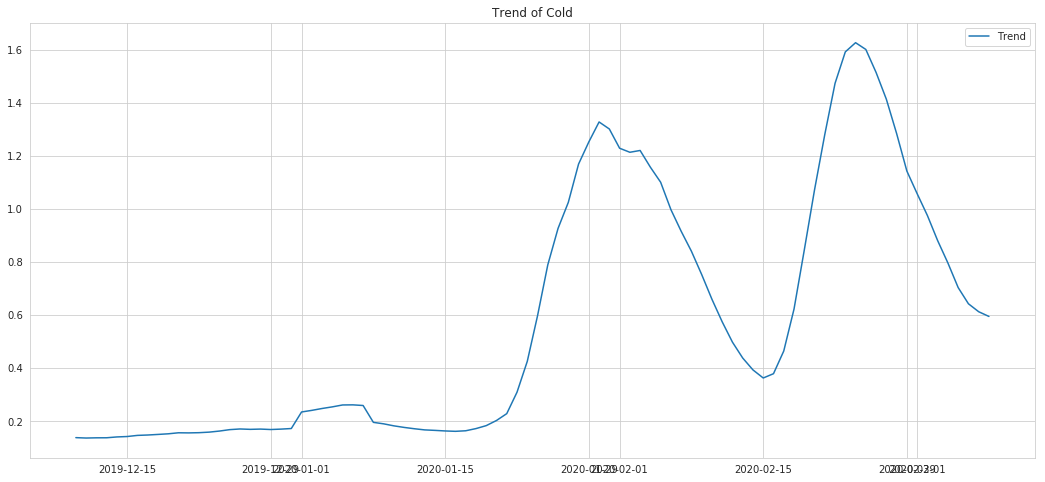

In [71]:
decomposition = seasonal_decompose(trend_cold) 
trend_cld = decomposition.trend
plt.figure(figsize=(18, 8))
plt.plot(trend_cld, label='Trend')
plt.title('Trend of Cold')
plt.legend(loc='best')

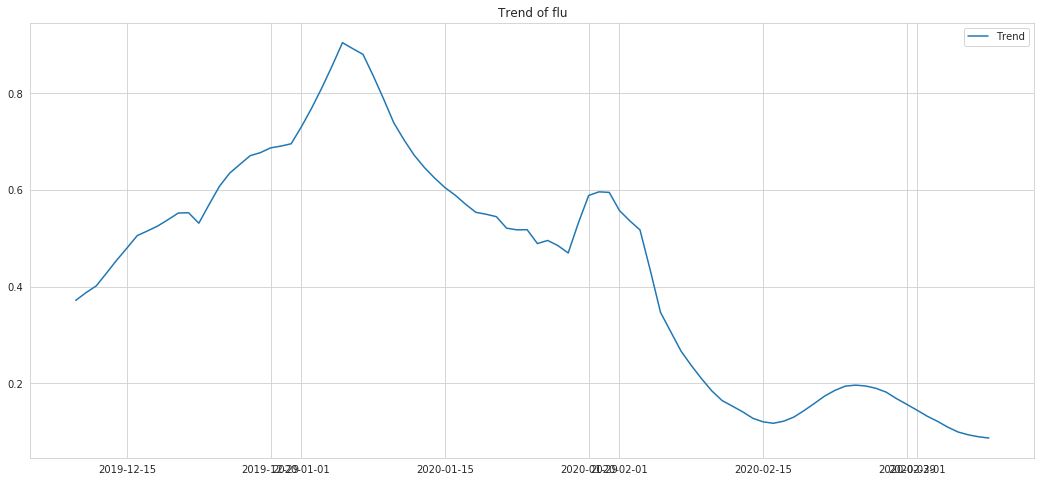

In [72]:
plt.figure(figsize=(18, 8))
decomposition = seasonal_decompose(trend_flu) 
trend_fl = decomposition.trend
plt.plot(trend_fl, label='Trend')
plt.title('Trend of flu')
plt.legend(loc='best')

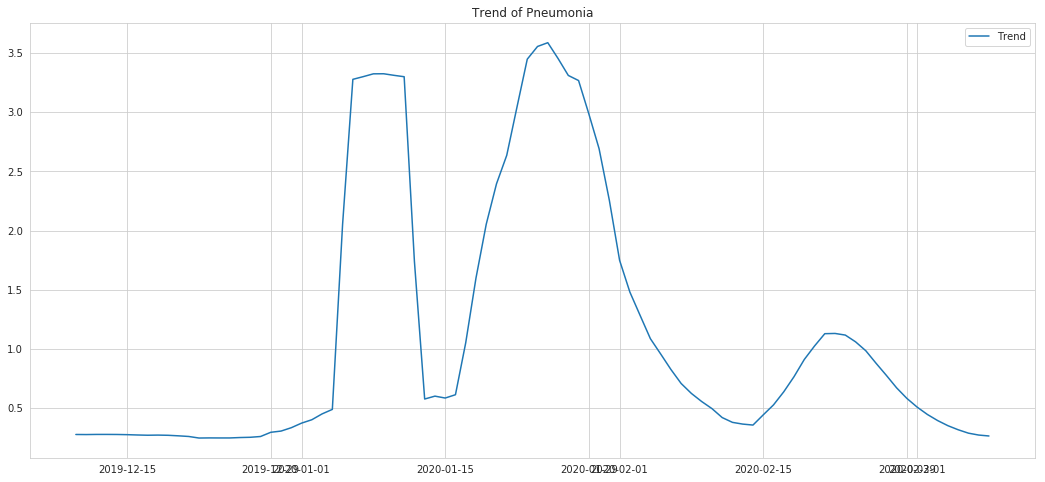

In [73]:
plt.figure(figsize=(18, 8))
decomposition = seasonal_decompose(trend_pneumonia) 
trend_pneu = decomposition.trend
plt.plot(trend_pneu, label='Trend')
plt.title('Trend of Pneumonia')
plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(18, 8))
decomposition = seasonal_decompose(trend_coronavirus) 
trend_corona = decomposition.trend
plt.plot(trend_corona, label='Trend')
plt.title('Trend of Coronavirus')
plt.legend(loc='best')